In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os

# Load & preprocess RnaSeq expression data

In [2]:
df_coad = pd.read_csv("data/tcga.coad.rnaseq.txt", sep="\t", low_memory=False)

In [3]:
df_coad.head()

,Hybridization REF,TCGA-A6-2671-01A-01R-1410-07,TCGA-A6-2672-01A-01R-0826-07,TCGA-A6-2674-01A-02R-0821-07,TCGA-A6-2676-01A-01R-0826-07,TCGA-A6-2677-01A-01R-0821-07,TCGA-A6-2678-01A-01R-0821-07,TCGA-A6-2679-01A-02R-1410-07,TCGA-A6-2680-01A-01R-1410-07,TCGA-A6-2681-01A-01R-1410-07,...,TCGA-AZ-4681-01A-01R-1410-07,TCGA-AZ-4684-01A-01R-1410-07,TCGA-CA-5256-01A-01R-1410-07,TCGA-CK-4951-01A-01R-1410-07,TCGA-CM-4746-01A-01R-1410-07,TCGA-CM-4747-01A-01R-1410-07,TCGA-CM-4748-01A-01R-1410-07,TCGA-CM-4750-01A-01R-1410-07,TCGA-CM-4752-01A-01R-1410-07,TCGA-CM-5341-01A-01R-1410-07
0,gene_id,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,...,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count
1,?|100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,20.4082,0.0000,0.0000,0.0000
2,?|100133144,31.7492,29.3631,19.5780,26.0449,0.5031,35.7625,0.0000,7.8027,22.0183,...,12.2247,7.0875,22.2144,11.3826,29.1717,4.1791,0.0000,26.7329,10.1591,12.4359
3,?|100134869,25.5263,27.9618,13.6701,25.9032,14.3774,6.7667,0.0000,79.6413,0.0000,...,16.9888,25.7157,18.8259,16.4435,35.5873,23.4646,0.0000,53.7041,0.0000,29.5221
4,?|10357,236.7337,828.1529,924.7059,624.3211,539.3129,662.1644,114.9147,200.3027,274.5780,...,601.9775,423.8171,700.0321,405.2435,293.0723,145.8608,322.6531,521.6683,668.8509,1022.0396


Keep GeneIds (first column) and remove first row

In [4]:
# Get gene_id labels for future usage
genes = df_coad.iloc[1:,0]
genes

1             ?|100130426
2             ?|100133144
3             ?|100134869
4                 ?|10357
5                 ?|10431
               ...       
20527            ZYX|7791
20528         ZZEF1|23140
20529          ZZZ3|26009
20530    psiTPTE22|387590
20531         tAKR|389932
Name: Hybridization REF, Length: 20531, dtype: object

In [5]:
# Get dataframe with only RNASeq expression values
df = df_coad.iloc[1:,1:]
df = df.astype('float')
df = df.set_index(genes)
df

,TCGA-A6-2671-01A-01R-1410-07,TCGA-A6-2672-01A-01R-0826-07,TCGA-A6-2674-01A-02R-0821-07,TCGA-A6-2676-01A-01R-0826-07,TCGA-A6-2677-01A-01R-0821-07,TCGA-A6-2678-01A-01R-0821-07,TCGA-A6-2679-01A-02R-1410-07,TCGA-A6-2680-01A-01R-1410-07,TCGA-A6-2681-01A-01R-1410-07,TCGA-A6-2682-01A-01R-1410-07,...,TCGA-AZ-4681-01A-01R-1410-07,TCGA-AZ-4684-01A-01R-1410-07,TCGA-CA-5256-01A-01R-1410-07,TCGA-CK-4951-01A-01R-1410-07,TCGA-CM-4746-01A-01R-1410-07,TCGA-CM-4747-01A-01R-1410-07,TCGA-CM-4748-01A-01R-1410-07,TCGA-CM-4750-01A-01R-1410-07,TCGA-CM-4752-01A-01R-1410-07,TCGA-CM-5341-01A-01R-1410-07
Hybridization REF,,,,,,,,,,,,,,,,,,,,,
?|100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,20.4082,0.0000,0.0000,0.0000
?|100133144,31.7492,29.3631,19.5780,26.0449,0.5031,35.7625,0.0000,7.8027,22.0183,32.8947,...,12.2247,7.0875,22.2144,11.3826,29.1717,4.1791,0.0000,26.7329,10.1591,12.4359
?|100134869,25.5263,27.9618,13.6701,25.9032,14.3774,6.7667,0.0000,79.6413,0.0000,0.0000,...,16.9888,25.7157,18.8259,16.4435,35.5873,23.4646,0.0000,53.7041,0.0000,29.5221
?|10357,236.7337,828.1529,924.7059,624.3211,539.3129,662.1644,114.9147,200.3027,274.5780,264.1228,...,601.9775,423.8171,700.0321,405.2435,293.0723,145.8608,322.6531,521.6683,668.8509,1022.0396
?|10431,1386.9969,1108.2803,1180.3069,1008.2645,1060.0607,1220.4360,880.5724,1242.1525,815.5963,1326.7544,...,1791.0112,1339.9602,2426.6404,1207.8261,1480.4217,850.4480,755.1020,1538.2324,1513.7021,2221.4452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX|7791,10306.5015,6440.7643,5661.1253,5883.1169,2395.7654,2830.4699,8027.8848,9752.2422,7866.9725,6945.1754,...,5788.7640,10274.3539,2017.2895,8973.9130,5554.2169,11480.2348,4367.3469,8228.4012,3846.9028,1956.8765
ZZEF1|23140,1205.8824,1759.2357,708.4399,1425.0295,530.0303,889.3159,1276.8299,1456.2780,1783.4862,666.6667,...,559.5506,826.0437,213.6201,1231.3043,561.7470,1013.0575,1693.8776,522.3436,814.9835,241.2587
ZZZ3|26009,346.7492,425.4777,425.8312,713.1051,1307.3609,1013.1062,58.7048,419.2825,548.6239,620.6140,...,337.0787,510.9344,625.0756,511.3043,417.1687,364.2454,428.5714,455.8093,845.4607,990.6760


In [6]:
# Are there rows with too many 'low values'?
perc_low_values = (df.abs() <= 0.01).sum(axis=1) / df.shape[1]
to_remove = perc_low_values > 0.5
to_remove.sum()


3367

In [7]:
# Remove rows with no data
df = df.loc[~to_remove].copy()

In [8]:
# Are there any samples with no data?
sum(df.sum(axis=0) == 0)

0

# Prepare cathegories

We want to know whether a sample belongs to a tumor or normal tissue.

TCGA documentation (https://docs.gdc.cancer.gov/Encyclopedia/pages/TCGA_Barcode/) mentions that the information is encoded in the 'BarCode'

For instance, sample `TCGA-05-4244-01A-01R-1107-07`, the fourth identifier is `01A` which means 'Tumor' (`01`), whereas sample `TCGA-91-6829-11A-01R-1858-07`, has the fourth identifier `11A` which means Normal.



In [9]:
def to_tumor_normal(barcode):
    return barcode.split('-')[3][0] == '0'

tn = [to_tumor_normal(b) for b in df.columns]
y = np.array(tn)
sum(y), sum(1-y)

(191, 0)

In [10]:
df_clinical = pd.read_csv("data/coadread_tcga_clinical_data.tsv", sep="\t", low_memory=False)

In [11]:
# Rename some columns for easier access
cli = df_clinical.rename(columns={'Sample ID': 'sample_id', 
                         'Overall Survival (Months)': 'os', 
                         'Overall Survival Status': 'os_status'}
                        )
cli = cli[['sample_id', 'os', 'os_status']].copy()
cli.set_index(cli.sample_id, inplace=True)
cli

,sample_id,os,os_status
sample_id,,,
TCGA-3L-AA1B-01,TCGA-3L-AA1B-01,NaN,NaN
TCGA-4N-A93T-01,TCGA-4N-A93T-01,4.80,LIVING
TCGA-4T-AA8H-01,TCGA-4T-AA8H-01,12.65,LIVING
TCGA-5M-AAT4-01,TCGA-5M-AAT4-01,1.61,DECEASED
TCGA-5M-AAT5-01,TCGA-5M-AAT5-01,NaN,NaN
...,...,...,...
TCGA-QL-A97D-01,TCGA-QL-A97D-01,21.88,LIVING
TCGA-RU-A8FL-01,TCGA-RU-A8FL-01,38.67,LIVING
TCGA-SS-A7HO-01,TCGA-SS-A7HO-01,60.09,LIVING


In [12]:
to_remove = pd.isna(cli.os) | pd.isna(cli.os_status)
sum(to_remove)

11

In [13]:
cli = cli.loc[~to_remove].copy()

In [14]:
cli.os_status.value_counts()

LIVING      499
DECEASED    130
Name: os_status, dtype: int64

In [15]:
cli = cli.loc[cli.os_status == 'DECEASED'].copy()

In [16]:
cli = cli[['sample_id', 'os']].copy()
cli

,sample_id,os
sample_id,,
TCGA-5M-AAT4-01,TCGA-5M-AAT4-01,1.61
TCGA-5M-AAT6-01,TCGA-5M-AAT6-01,9.53
TCGA-A6-2671-01,TCGA-A6-2671-01,43.73
TCGA-A6-2676-01,TCGA-A6-2676-01,42.87
TCGA-A6-2677-01,TCGA-A6-2677-01,24.31
...,...,...
TCGA-G5-6572-02,TCGA-G5-6572-02,47.04
TCGA-NH-A50U-01,TCGA-NH-A50U-01,10.97
TCGA-NH-A6GA-01,TCGA-NH-A6GA-01,9.92


In [17]:
# Convert RnaSeq column names to sample_ids in clinical data
sample_2_barcode = {c[:15]:c for c in df.columns}
barcode_2_sample = {c:c[:15] for c in df.columns}
c2s = set(sample_2_barcode.keys())

# Only keep sample_ids that are in RnaSeq and have Clinical information
keep_sample_ids = set([s for s in cli.sample_id if s in c2s])
len(keep_sample_ids)

38

In [18]:
keep_barcodes = [sample_2_barcode[s] for s in keep_sample_ids]
df_x = df[keep_barcodes].rename(columns=barcode_2_sample)
df_x


,TCGA-AA-3552-01,TCGA-AA-A02J-01,TCGA-A6-2676-01,TCGA-AA-A03F-01,TCGA-AY-4070-01,TCGA-AA-A02H-01,TCGA-AA-3715-01,TCGA-A6-2682-01,TCGA-AA-3848-01,TCGA-A6-2671-01,...,TCGA-A6-2677-01,TCGA-AA-A00N-01,TCGA-AY-4071-01,TCGA-AA-3666-01,TCGA-AA-3818-01,TCGA-AA-3680-01,TCGA-AA-3869-01,TCGA-AA-3989-01,TCGA-AA-3852-01,TCGA-AA-3516-01
Hybridization REF,,,,,,,,,,,,,,,,,,,,,
?|100133144,25.7705,27.3047,26.0449,77.6789,11.1133,55.3548,15.1036,32.8947,13.5901,31.7492,...,0.5031,9.5050,54.7979,0.0000,38.0685,18.8383,14.4102,37.2678,0.0000,3.8614
?|100134869,18.8629,51.3633,25.9032,82.4548,78.1545,12.3871,161.9403,0.0000,131.3048,25.5263,...,14.3774,42.4752,54.0104,29.9335,49.8127,44.5035,30.8940,49.6694,53.5485,15.9406
?|10357,407.4814,467.7156,624.3211,137.1812,509.6891,504.4839,107.0254,264.1228,158.1020,236.7337,...,539.3129,400.7054,405.0466,881.7849,523.6840,337.6939,687.2394,358.6629,414.3161,572.7351
?|10431,894.7928,1015.8100,1008.2645,682.6754,605.8175,1216.1290,853.8840,1326.7544,949.3117,1386.9969,...,1060.0607,1553.2178,962.6943,1564.3016,1049.7807,875.0554,1353.0291,1047.4357,1089.6502,1435.6436
?|155060,327.3114,171.0838,97.9929,362.4079,395.1856,222.5806,288.2838,122.8070,677.8419,263.1579,...,104.1637,172.0297,222.7979,175.1663,158.9851,204.1014,161.1786,141.4038,281.4411,60.6436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B|79699,637.6196,562.8962,407.3200,140.4682,466.3992,451.6129,153.5424,364.0351,183.2005,345.2012,...,1011.1675,670.7921,395.8549,578.7140,628.7499,554.8273,665.6241,259.7641,409.7085,471.5347
ZYX|7791,4541.9766,3916.5967,5883.1169,10450.8326,5981.9458,4154.8387,11172.5629,6945.1754,5980.6640,10306.5015,...,2395.7654,5896.0396,6248.7047,6770.5100,6169.2592,4221.6142,4052.9886,4115.3750,7799.4047,5696.7822
ZZEF1|23140,1350.6908,837.0885,1425.0295,3525.7513,950.8526,1087.0968,1173.5030,666.6667,1953.5837,1205.8824,...,530.0303,1367.5743,1987.5648,925.7206,341.9377,1508.4734,562.8183,1403.5639,1173.0863,1047.0297


In [19]:
df_y = pd.DataFrame([cli.os], columns=cli.sample_id)
df_y = df_y[keep_sample_ids].copy()

In [20]:
df = pd.concat([df_y,df_x], axis=0, sort=True)
df

sample_id,TCGA-A6-2671-01,TCGA-A6-2676-01,TCGA-A6-2677-01,TCGA-A6-2682-01,TCGA-A6-2683-01,TCGA-AA-3488-01,TCGA-AA-3492-01,TCGA-AA-3516-01,TCGA-AA-3529-01,TCGA-AA-3552-01,...,TCGA-AA-A024-01,TCGA-AA-A02E-01,TCGA-AA-A02H-01,TCGA-AA-A02J-01,TCGA-AA-A02R-01,TCGA-AA-A03F-01,TCGA-AY-4070-01,TCGA-AY-4071-01,TCGA-AZ-4614-01,TCGA-CK-4951-01
os,43.7300,42.8700,24.3100,13.9300,16.5600,5.0300,3.0200,13.0100,0.0000,13.0100,...,39.0300,2.9600,2.0000,5.0300,22.0100,18.0400,16.2900,0.9500,5.6500,70.1100
?|100133144,31.7492,26.0449,0.5031,32.8947,28.4628,15.0598,9.6911,3.8614,12.2627,25.7705,...,19.5615,28.6003,55.3548,27.3047,28.4048,77.6789,11.1133,54.7979,47.1776,11.3826
?|100134869,25.5263,25.9032,14.3774,0.0000,29.7896,39.6410,4.7876,15.9406,10.9161,18.8629,...,43.7759,44.1491,12.3871,51.3633,29.0566,82.4548,78.1545,54.0104,22.0080,16.4435
?|10357,236.7337,624.3211,539.3129,264.1228,72.8155,340.4957,459.9517,572.7351,355.7285,407.4814,...,267.8928,592.8858,504.4839,467.7156,537.5472,137.1812,509.6891,405.0466,552.1279,405.2435
?|10431,1386.9969,1008.2645,1060.0607,1326.7544,760.5178,1711.1111,1539.5753,1435.6436,1097.1302,894.7928,...,1038.9769,1269.3139,1216.1290,1015.8100,969.9828,682.6754,605.8175,962.6943,1425.7502,1207.8261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B|79699,345.2012,407.3200,1011.1675,364.0351,97.0874,189.7436,211.3900,471.5347,385.2097,637.6196,...,415.3471,332.2584,451.6129,562.8962,442.5386,140.4682,466.3992,395.8549,342.4253,498.2609
ZYX|7791,10306.5015,5883.1169,2395.7654,6945.1754,7749.1909,5958.9744,3050.1931,5696.7822,3503.3113,4541.9766,...,5492.0828,4345.4184,4154.8387,3916.5967,6593.4820,10450.8326,5981.9458,6248.7047,3667.7161,8973.9130
ZZEF1|23140,1205.8824,1425.0295,530.0303,666.6667,1425.5663,596.5812,1054.0541,1047.0297,1201.9868,1350.6908,...,1516.4434,812.1872,1087.0968,837.0885,1366.2093,3525.7513,950.8526,1987.5648,1071.0642,1231.3043
ZZZ3|26009,346.7492,713.1051,1307.3609,620.6140,218.4466,357.2650,746.1390,629.9505,773.7307,582.3592,...,493.3009,517.9322,358.0645,798.9002,830.1887,205.0835,412.2367,364.7668,622.6710,511.3043


# Create dataset for model trainig

In [21]:
x = df.iloc[1:].to_numpy().T
x

array([[3.1749200e+01, 2.5526300e+01, 2.3673370e+02, ..., 1.2058824e+03,
        3.4674920e+02, 6.0371500e+01],
       [2.6044900e+01, 2.5903200e+01, 6.2432110e+02, ..., 1.4250295e+03,
        7.1310510e+02, 8.7839430e+02],
       [5.0310000e-01, 1.4377400e+01, 5.3931290e+02, ..., 5.3003030e+02,
        1.3073609e+03, 2.1824780e+02],
       ...,
       [5.4797900e+01, 5.4010400e+01, 4.0504660e+02, ..., 1.9875648e+03,
        3.6476680e+02, 6.9430100e+01],
       [4.7177600e+01, 2.2008000e+01, 5.5212790e+02, ..., 1.0710642e+03,
        6.2267100e+02, 3.8516274e+03],
       [1.1382600e+01, 1.6443500e+01, 4.0524350e+02, ..., 1.2313043e+03,
        5.1130430e+02, 4.2347830e+02]])

In [22]:
y = df.iloc[0].to_numpy().T
y

array([43.73, 42.87, 24.31, 13.93, 16.56,  5.03,  3.02, 13.01,  0.  ,
       13.01,  2.  , 11.01, 35.97,  5.03, 19.02, 10.05,  0.99,  0.  ,
       10.05,  0.  ,  0.  , 27.  ,  2.  ,  2.  ,  7.95,  4.01, 10.97,
       38.04, 39.03,  2.96,  2.  ,  5.03, 22.01, 18.04, 16.29,  0.95,
        5.65, 70.11])

In [23]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

Make sure the dimentions for `x` and `y` match

In [24]:
genes = df.iloc[1:].index.values
x.shape, y.shape, len(genes)

((38, 17164), (38,), 17164)

# Create Random Forest classifier

In [25]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

# rf = GradientBoostingRegressor(n_estimators=100)
# rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
# rf = ExtraTreesRegressor(n_estimators=100, n_jobs=-1)
rf = RidgeCV(cv=10)
rf.fit(x, y)

/home/pcingola/logml/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [ ]:
pd.Series(rf.feature_importances_, genes).sort_values(ascending=False).head(10)

In [26]:
pd.Series(np.abs(rf.coef_), genes).sort_values(ascending=False)

SLC28A2|9153       3.241805e-02
ECEL1|9427         2.945129e-02
NMUR2|56923        2.935563e-02
HIST1H4A|8359      2.926896e-02
C6orf147|387097    2.915461e-02
                       ...     
CCR7|1236          2.980278e-06
APH1B|83464        2.207075e-06
SELO|83642         2.194123e-06
ITGA7|3679         1.022023e-06
WAC|51322          3.759891e-07
Length: 17164, dtype: float64

In [29]:
gene='SLC28A2|9153'

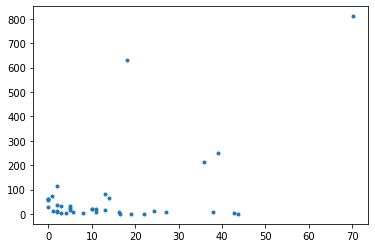

In [30]:
plt.plot(df.loc['os'], df.loc[gene], '.')